#### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

#starting time -> da izmjerimo koliko programu treba da se sav kod izvrši
begin = time.time()

#### Data Preprocessing

In [ ]:
fldr="/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFace"

In [ ]:
import os
files=os.listdir(fldr)


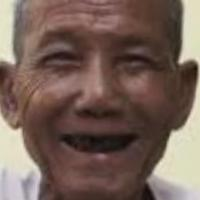

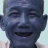

finished


In [ ]:
#prolazimo kroz svaku sliku i iz naziva uzimamo podatke o godinama i spolu(prvo broj u nazivu označava godine, a drugi spol)
#0- muško, 1-žensko
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  #iz slike uzimamo podatke i spremamo u polje
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

  #učitavanje slike iz putanje kao polje piksela, promjena formata boje i rezising te spremanje u polje
  total=fldr+'/'+fle
  #print(total)
  image=cv2.imread(total)

  #iz dokumentacije: When the image file is read with the OpenCV function imread(), the order of colors is BGR
    #Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

print("finished")



In [ ]:
# start timer after images are uploaded and ready
#start = time.time()

In [ ]:
''' visak 
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)
'''

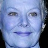

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

80
1


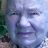

In [ ]:
cv2_imshow(images[53])

In [ ]:
print(ages[53])
print(genders[53])

80
1


In [ ]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

In [ ]:
#loadanje ako smo već jednom obradili
import numpy as np
genders_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFacegender.npy')
images_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceimage.npy')
ages_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceage.npy')

Male = 0
Female= 1

In [ ]:

values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


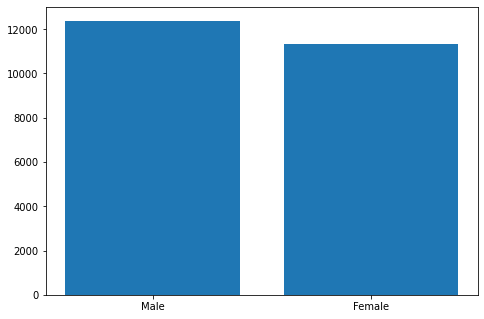

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[counts[0],counts[1]]
ax.bar(gender,values)
plt.show()

In [ ]:
#vidimo da ima npr 1123 osoba s 1 godinom i 4 osobe za 116 godina
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
#val=values.tolist()
cnt=counts.tolist()

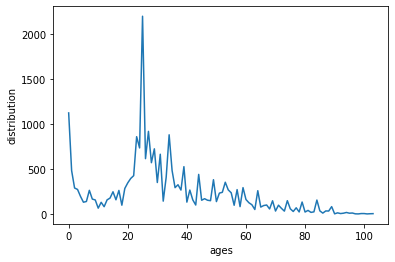

In [ ]:
#u bazi podataka najviše dvadesetogodišnjaka
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [ ]:
#pripremanje kategorija za varijablu Y
labels=[]

i=0
while i<len(ages_f):
  label=[]
  label.append([ages_f[i]])
  label.append([genders_f[i]])
  labels.append(label)
  i+=1

In [ ]:
#normalizacija podataka
images_f_2=images_f/255

In [ ]:
labels_f=np.array(labels)

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [ ]:
#prvi element označava godine, drugi spol
Y_train[0:5]

array([[[26],
        [ 1]],

       [[76],
        [ 1]],

       [[88],
        [ 1]],

       [[35],
        [ 0]],

       [[65],
        [ 1]]])

In [ ]:
#pretvaranje iz oblika [[[godina], [spol]],...] u oblik [[godina],[godina],...][[spol], [spol],...]] dakle iz toga da u svaki array sadrži godinu i spol u oblik da jedan array sadrži godinu a drugi spol
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2

[array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [0]]), array([[26],
        [76],
        [88],
        ...,
        [24],
        [ 6],
        [37]])]

In [ ]:
Y_train_2[1][0:5]

array([[26],
       [76],
       [88],
       [35],
       [65]])

### Model

In [ ]:
import time
#start timer after images are uploaded and ready
start = time.time()

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

#https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  drop_1=Dropout(0.4)(conv_1)
  conv_2= Convolution(drop_1,32)
  drop_2=Dropout(0.4)(conv_2)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (drop_2)

  conv_3= Convolution(maxp_1,64)
  drop_3=Dropout(0.4)(conv_3)
  conv_4= Convolution(drop_3,64)
  drop_4=Dropout(0.4)(conv_4)
  maxp_2 = MaxPooling2D(pool_size = (2,2)) (drop_4)

  conv_5= Convolution(maxp_2,128)
  drop_5=Dropout(0.4)(conv_5)
  conv_6= Convolution(drop_5,128)
  drop_6=Dropout(0.4)(conv_6)
  maxp_3 = MaxPooling2D(pool_size = (2,2)) (drop_6)

  flatten= Flatten() (maxp_3)
  output_1= Dense(1,activation="sigmoid",name='gender_out')(flatten)
  output_2= Dense(1,activation="relu",name='age_out')(flatten)
  
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

#### Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='Age_and_gender44.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=30,callbacks=[callback_list])

Epoch 1/30
278/278 [==============================] - 16s 28ms/step - loss: 19.2639 - gender_out_loss: 0.8315 - age_out_loss: 18.1169 - gender_out_accuracy: 0.5480 - age_out_accuracy: 0.0487 - val_loss: 28.3590 - val_gender_out_loss: 0.6792 - val_age_out_loss: 27.4452 - val_gender_out_accuracy: 0.5588 - val_age_out_accuracy: 0.0454

Epoch 00001: val_loss improved from inf to 28.35901, saving model to Age_and_gender44.h5
Epoch 2/30
278/278 [==============================] - 7s 25ms/step - loss: 15.6897 - gender_out_loss: 0.6719 - age_out_loss: 14.7925 - gender_out_accuracy: 0.6080 - age_out_accuracy: 0.0448 - val_loss: 25.9750 - val_gender_out_loss: 0.6425 - val_age_out_loss: 25.1249 - val_gender_out_accuracy: 0.6472 - val_age_out_accuracy: 0.0454

Epoch 00002: val_loss improved from 28.35901 to 25.97504, saving model to Age_and_gender44.h5
Epoch 3/30
278/278 [==============================] - 7s 25ms/step - loss: 14.4063 - gender_out_loss: 0.6413 - age_out_loss: 13.5597 - gender_out_ac

In [ ]:
#ne radi
Model.save('age_and_gender_2.h5')

In [ ]:
#drugi nacin za spremanje
saveModel='age_and_gender_22.h5'
checkpointer = ModelCheckpoint(saveModel, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
end = time.time()
try:
  print(f"Runtime of the full program is {end - begin}")
except: pass

print(f"Runtime of the model training is {end - start}")

Runtime of the model training is 225.8324944972992


### Evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 4ms/step - loss: 16.9109 - gender_out_loss: 0.3808 - age_out_loss: 16.0349 - gender_out_accuracy: 0.8542 - age_out_accuracy: 0.0027


[16.91092300415039,
 0.38075384497642517,
 16.03490447998047,
 0.8542264103889465,
 0.002699510660022497]

In [ ]:
pred=Model.predict(X_test)

In [ ]:
pred[1]

array([[ 0.      ],
       [19.522097],
       [17.4951  ],
       ...,
       [23.902874],
       [13.176726],
       [ 0.      ]], dtype=float32)

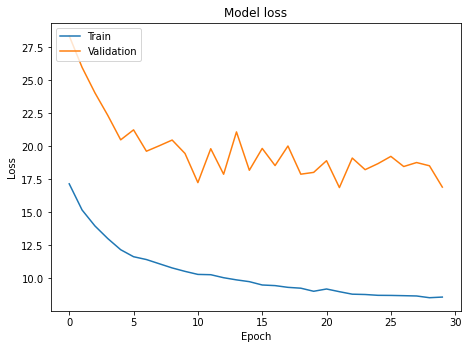

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For Gender

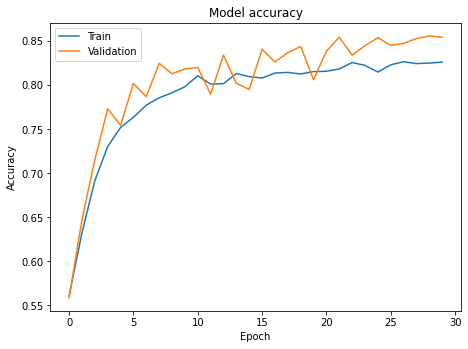

In [ ]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

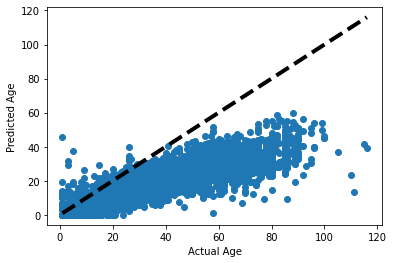

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:

report=classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3068
           1       0.87      0.82      0.84      2859

    accuracy                           0.85      5927
   macro avg       0.86      0.85      0.85      5927
weighted avg       0.86      0.85      0.85      5927



In [ ]:

results = confusion_matrix(Y_test_2[0], Pred_l)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
def test_image(ind,images_f,images_f_2,Model):

  #pretvorba nazad u rgb format
  image = cv2.cvtColor(images_f[ind], cv2.COLOR_BGR2RGB)
  cv2_imshow(image)
  image_test=images_f_2[ind]

  #podaci iz slike i modela
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  gender_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  gender=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))
  print("Real Age: "+ str(ages_f[ind]))
  print("Predicted Gender: "+ gender_f[gender])
  print("Real Gender: "+ gender_f[genders_f[ind]])



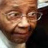

Predicted Age: 33
Real Age: 80
Predicted Gender: Male
Real Gender: Female


In [ ]:

test_image(57,images_f,images_f_2,Model)

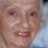

Predicted Age: 28
Real Age: 83
Predicted Gender: Male
Real Gender: Female


In [ ]:
test_image(137,images_f,images_f_2,Model)

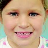

Predicted Age: 0
Real Age: 8
Predicted Gender: Female
Real Gender: Female


In [ ]:
test_image(502,images_f,images_f_2,Model)

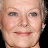

Predicted Age: 36
Real Age: 80
Predicted Gender: Female
Real Gender: Female


In [ ]:
test_image(24,images_f,images_f_2,Model)